DBSCAN : It is unsupervised clustering algorithm
Density based spatial clustering of application with noise
Density
Clustering
Noise

It uses the density to cluster the points with noise
Density : It is a amount of data present in a unit volume
There are 2 imp parameters
epsilon : It is a measure of neighborhood (Within a radius of epsilon all the data points)
min_samples(z) : A threshold on the least number of points in a neighborhood
Based on the above parameters we are going to classify the points into 3 types as follows
core points : Number of neighbors >= threshold (min_samples)
Boundary points : number of neighbors < threshold
                  Point should be in the neighbor of core point
Noise : Neither core point nor boundary point

If two core points are neighbor of each other then we connect two point via density edge then both point are called as density connected points

1. Classify the points
2. Discard the noise
3. Assign cluster to a core point
4. Color all the density connected of a core point
Repeat 3 and 4 for all the uncolored point
5. Color boundary points according to nearest core point

How to determine epsilon and min_samples
min_samples ~ Dimensionality
For epsilon =, we can use elbow method


In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt 
from matplotlib.pyplot import figure
from pandas import DataFrame

In [2]:
X, _= make_blobs(n_samples=500, centers=3, n_features=2,random_state=20)
#This function returns 2 output. First is the datapoints and second is array of labels
#We declare variable as _ because DBSCAN is a unsupervised learning algo which does not require labels

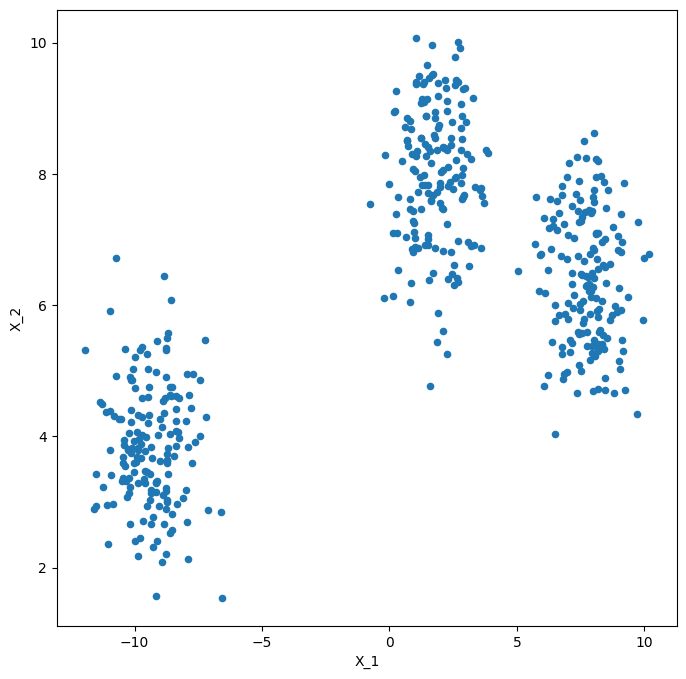

In [4]:
df = DataFrame(dict(x=X[:,0], y=X[:,1]))
fig, ax = plt.subplots(figsize=(8,8))
df.plot(ax=ax,kind='scatter',x='x',y='y')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

In [5]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=1,min_samples=5).fit(X)
cluster = clustering.labels_

In [6]:
len(set(cluster))

4

In [7]:
def show_clusters(X,cluster):
    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=cluster))
    colors = {-1:'red',0:'blue',1:'orange',2:'green',3:'skyblue'}
    fig, ax = plt.subplots(figsize=(8,8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x',y='y',label=key,color=colors[key])
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.show()

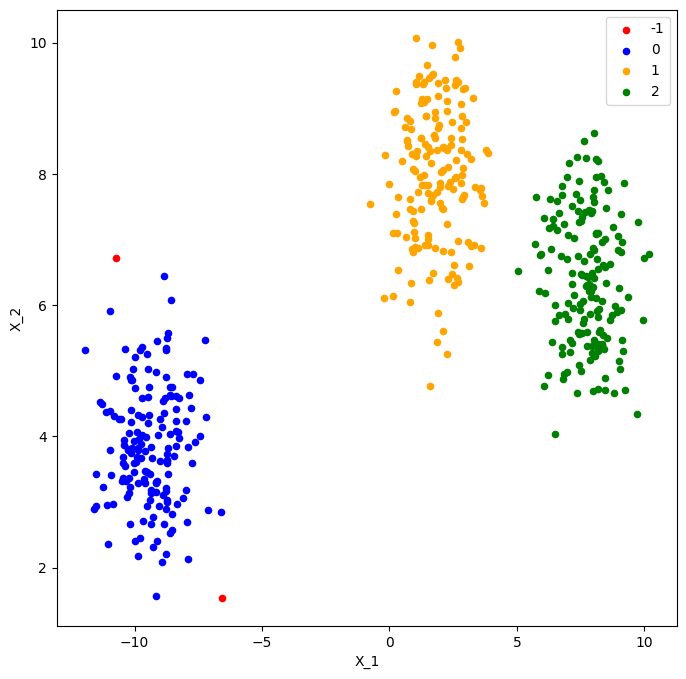

In [8]:
show_clusters(X,cluster)

In [ ]:
#The red points are noise